In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv",sep=',')
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


importing the csv file

# EDA(Exploratory Data Analysis)

In [12]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

checking out the the datatypes across the columns

In [13]:
# getting their shapes
print("Shape of train :", df.shape)

Shape of train : (614, 13)


checking out the shape of the dataframe

In [14]:
# describing the training set
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


checking out all the statistical measures of the dataframe

In [15]:
# check the info of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


checking out the information about the dataframe

In [16]:
# check null values training set
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

checking out is there any null values across the columns

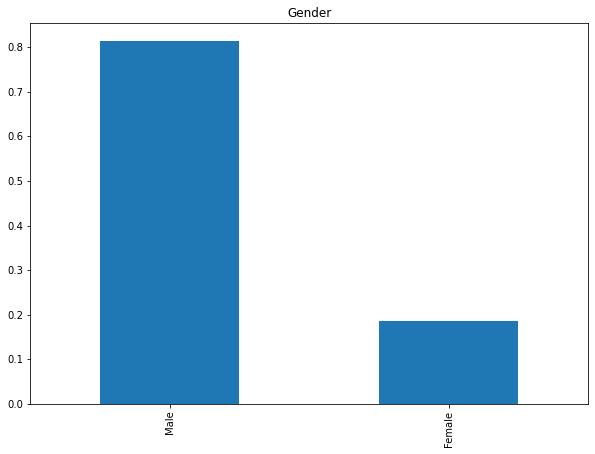

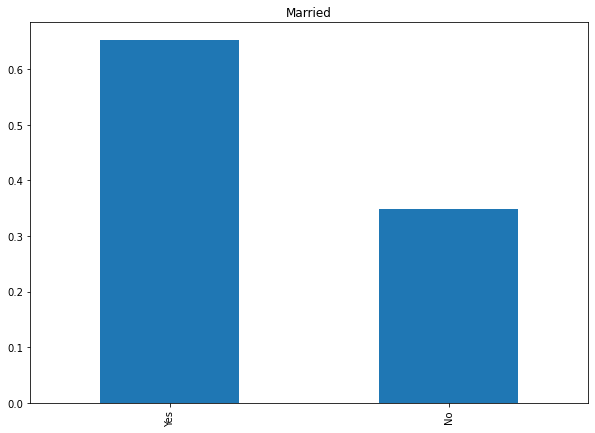

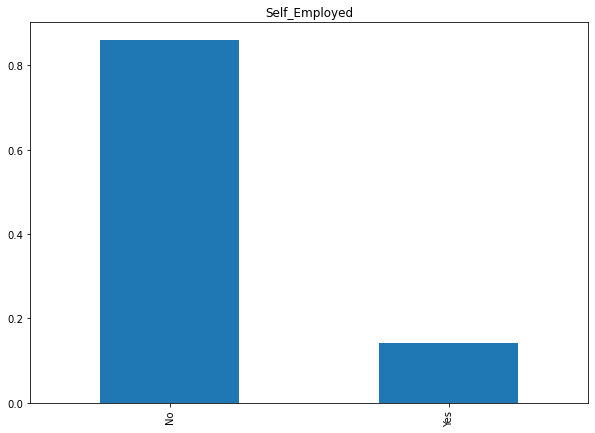

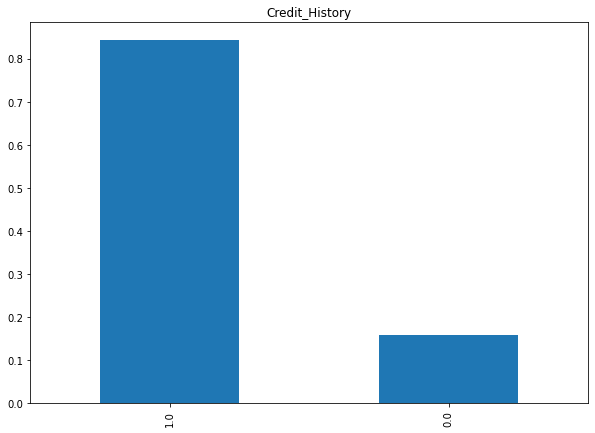

In [17]:
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,7), title='Gender')
plt.show()
df['Married'].value_counts(normalize=True).plot.bar(figsize=(10,7),title='Married')
plt.show()
df['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(10,7),title='Self_Employed')
plt.show()
df['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(10,7),title='Credit_History')
plt.show()

It can be inferred from the above bar plots that:

*80% of applicants in the dataset are male.

*Around 65% of the applicants in the dataset are married.

*Around 15% of applicants in the dataset are self-employed.

*Around 85% of applicants have repaid their doubts.

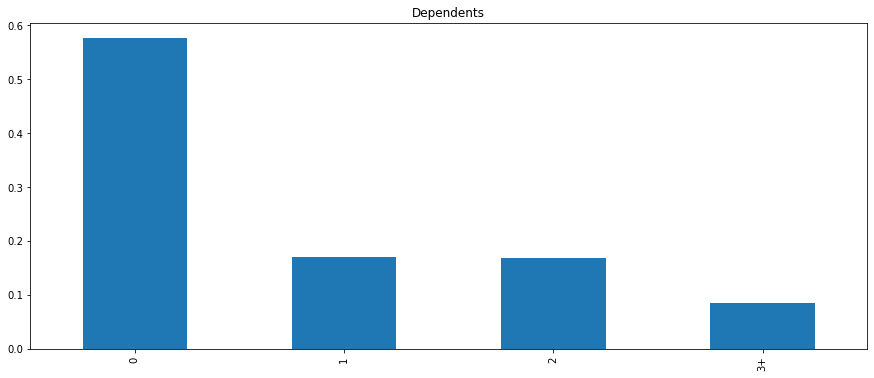

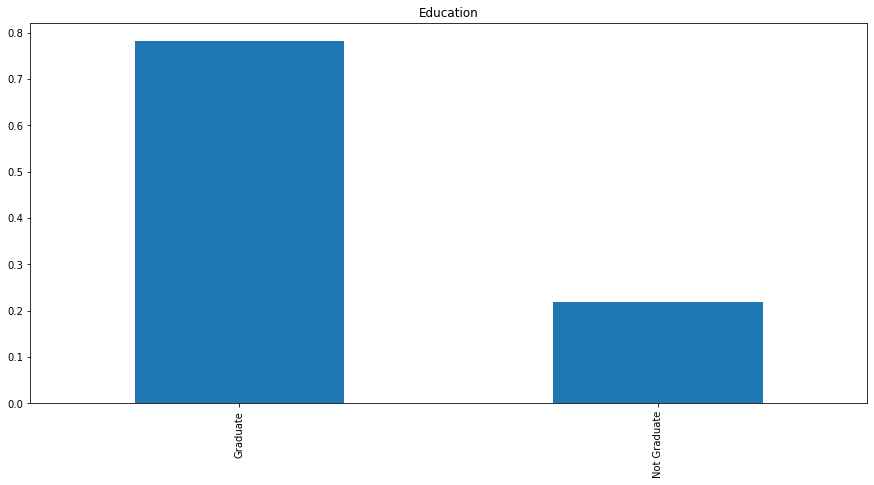

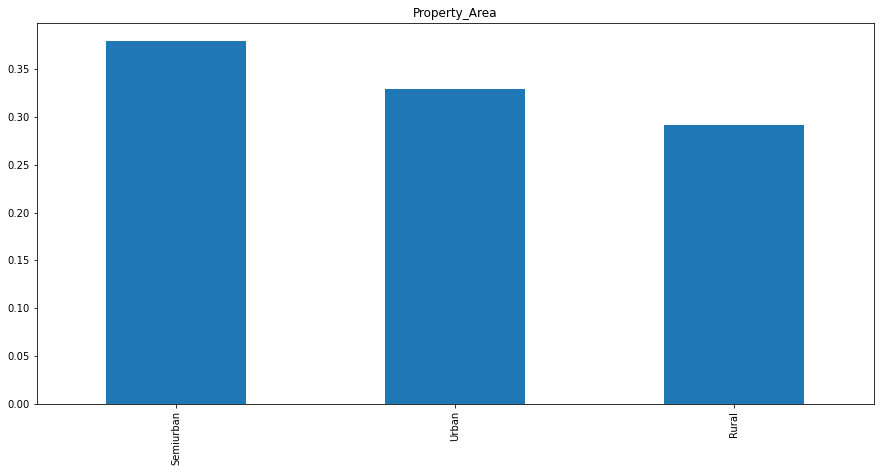

In [18]:
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,6), title='Dependents')
plt.show()
df['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
df['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

The following inferences can be made from the above bar plots:

*Most of the applicants don't have any dependents.

*Around 80% of the applicants are Graduate.

*Most of the applicants are from the Semiurban area.

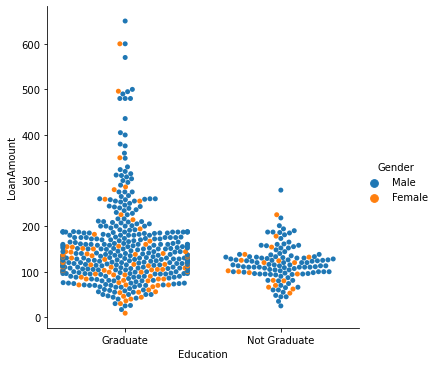

In [19]:
sns.catplot(data=df, kind="swarm", x="Education", y="LoanAmount",hue = 'Gender')

from the above graph we can say that male graduates mostily avail for loan as compare to female graduate and same goes to non graduates

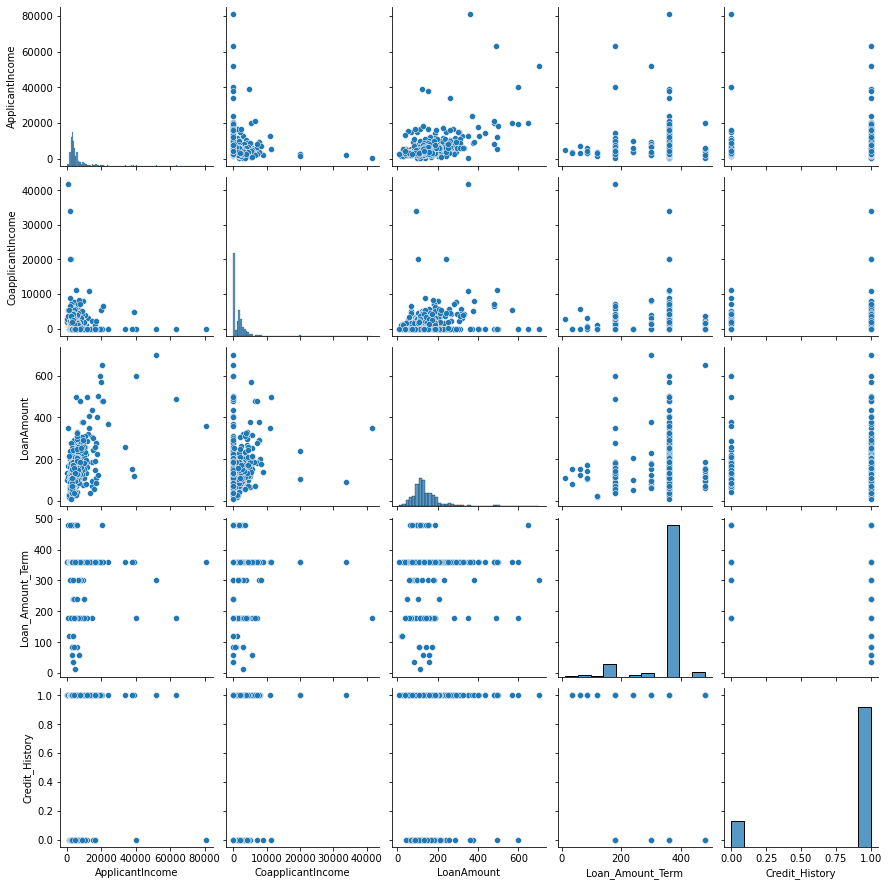

In [20]:
sns.pairplot(df)

Here i tried to visualize the relation between all the columns with respect to each other with pair plot

In [21]:
from sklearn.preprocessing import LabelEncoder

cols = ['Gender','Dependents', 'Married', 'Self_Employed','Credit_History','Education','Property_Area','Loan_Status','Loan_ID']
#
# Encode labels of multiple columns at once
#
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


here i encoded all the string categorical values into uniue intergers with the help of labeleoncoder

In [22]:
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
4     15
Name: Dependents, dtype: int64

In [23]:
col2 = ['LoanAmount','Loan_Amount_Term']
df[col2] = df[col2].fillna(df[col2].mean())

df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

dealing with missing values in continuous columns as well as categorical columns

In [24]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

we can see there is no missing values

# Plotting outliers

Loan_ID                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
Gender                AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Married               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Dependents            AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Education               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Self_Employed        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
ApplicantIncome      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
CoapplicantIncome    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
LoanAmount              AxesSubplot(0.125,0.321957;0.168478x0.16413)
Loan_Amount_Term     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Credit_History       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Property_Area        AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Loan_Status                AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

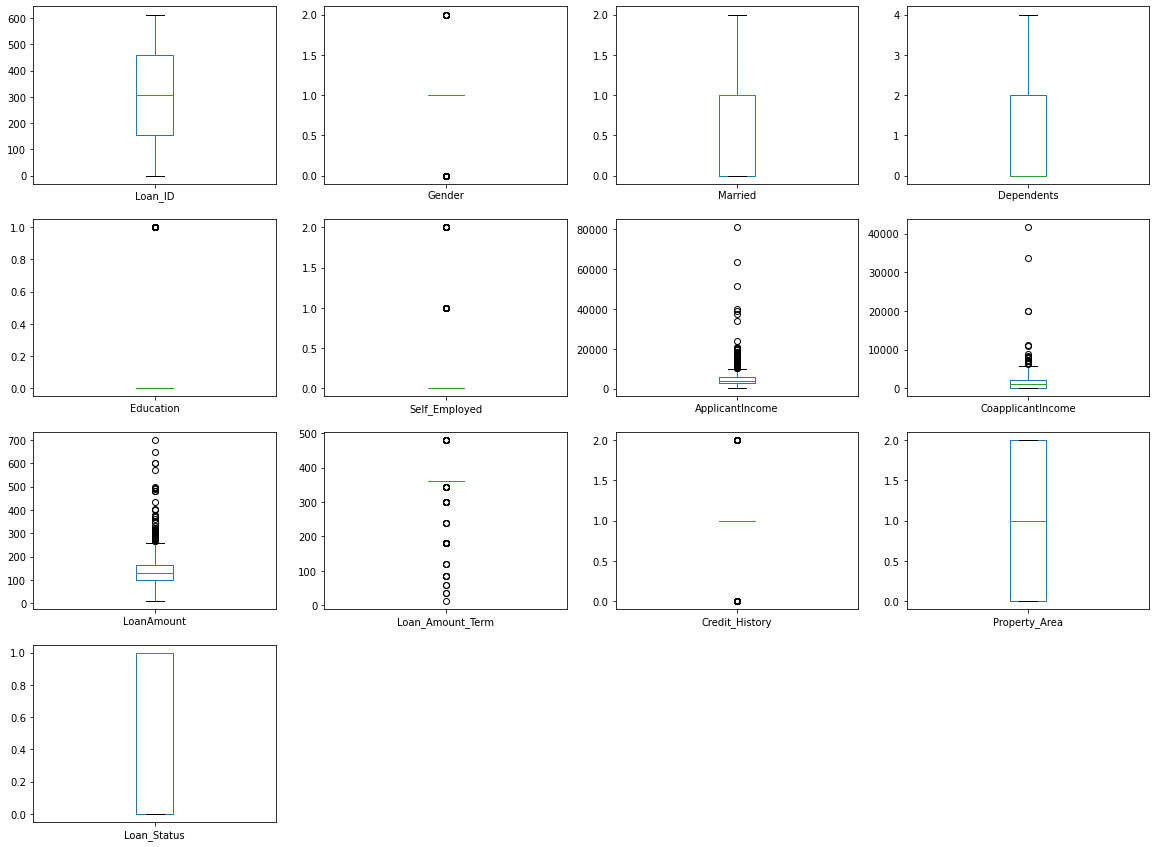

In [25]:
df.plot(kind = 'box',subplots = True,layout=(4,4),figsize = (20,15))

here tried to show is there any outliers present across the columns and we could see there is outliers present so we try to minimise the outliers

# Applying IQR method

In [26]:
dfcontcol = df.drop(columns = ['Loan_ID','Gender','Married','Self_Employed','Credit_History','Loan_Status','Property_Area'],axis = 1)

here i deleted the categorical columns IQR method works only is continuous values

In [27]:
dfcontcol.columns

Index(['Dependents', 'Education', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term'],
      dtype='object')

In [28]:
# finding out the quantile of data with continuous columns
Q1 = dfcontcol.quantile(0.25)
Q3 = dfcontcol.quantile(0.75)
IQR = Q3 - Q1

# removing outliers using IQR method
df_new = df[~((dfcontcol < (Q1 - 1.5 * IQR)) |(dfcontcol > (Q3 + 1.5 * IQR))).any(axis=1)]

here i applied IQR methos to minimise the outliers

In [29]:
print(df_new.shape)
print(df.shape)

(346, 13)
(614, 13)


here i can see we have minimised the outliers

In [30]:
df.skew()

Loan_ID              0.000000
Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -0.199751
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

here i checked is there any skewness in the data frame and yes there is skewness

In [31]:
skew = ['Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Dependents']
for col in skew:
    if df.skew().loc[col]>0.055:
        df[col] = np.log1p(df[col])

here i tried to check the skewness across the column

<AxesSubplot:>

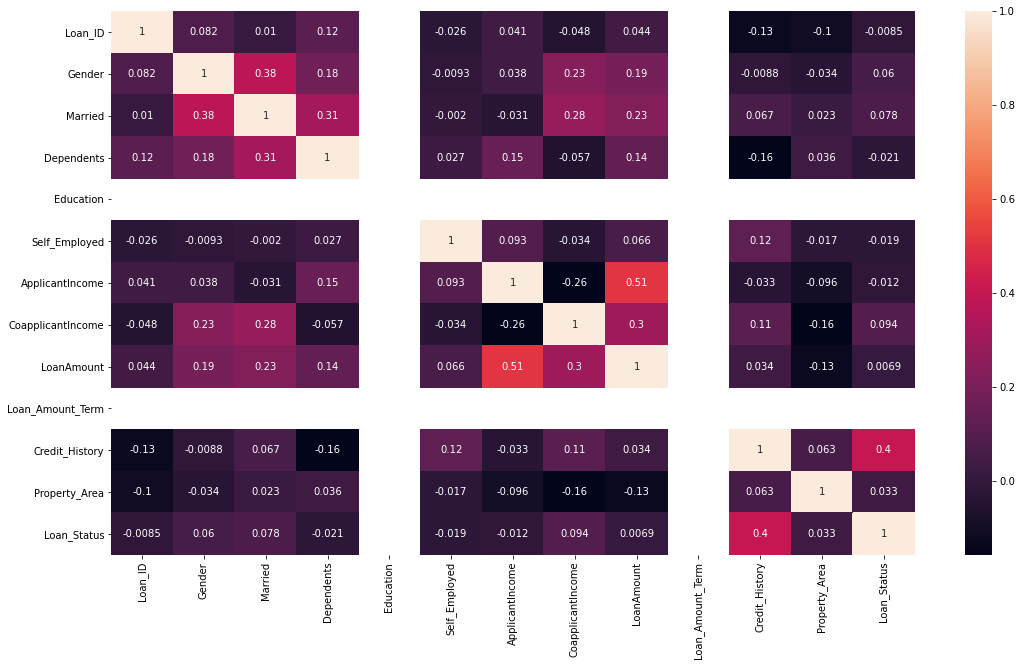

In [32]:
plt.figure(figsize=(18,10))
sns.heatmap(df_new.corr(),annot = True,robust = True)

here i ploted the heatmap to show multicolinearity across the columns

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_new.values, i)
                          for i in range(len(df_new.columns))]
  
print(vif_data)

              feature        VIF
0             Loan_ID   1.050209
1              Gender   1.224756
2             Married   1.385786
3          Dependents   1.220152
4           Education        NaN
5       Self_Employed   1.034694
6     ApplicantIncome   1.872742
7   CoapplicantIncome   1.652180
8          LoanAmount   1.929669
9    Loan_Amount_Term  23.410037
10     Credit_History   1.295664
11      Property_Area   1.074474
12        Loan_Status   1.217834


here i used vif to check the strength of multicolinearity across the columns

In [34]:
df.drop('Loan_Amount_Term',axis = 1,inplace = True)

here i droped the column having highest multicolinearity

# Preprocessing

In [35]:
# now split the data into feature and target variables
x = df_new.drop(columns = ['Loan_ID','Loan_Status'])
y = df_new['Loan_Status']

here i split the new dataset into x an y

In [36]:
print(x.shape)
print(y.shape)

(346, 11)
(346,)


checked the shape of x and y

## imbalanced data set

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

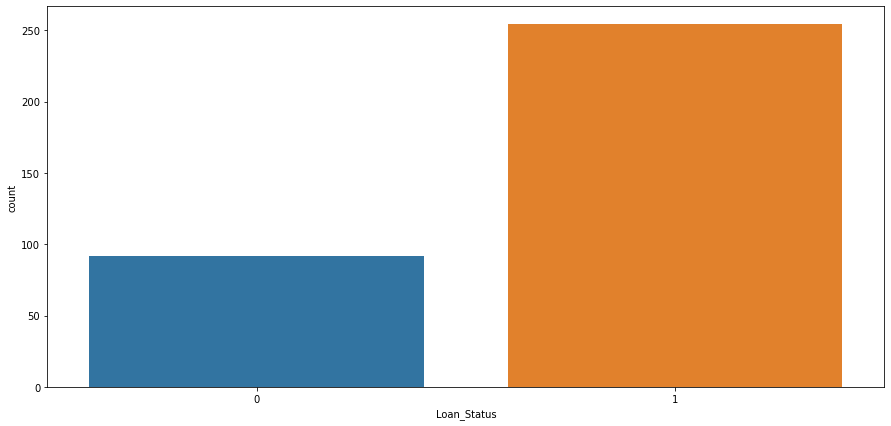

In [37]:
sns.countplot(y)

here i checked is there any imbalace data in the target variable and yes there is imbalance data

In [38]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

# checking the sizes of the sample data
print("Size of x-sample :", x.shape)
print("Size of y-sample :", y.shape)

Size of x-sample : (508, 11)
Size of y-sample : (508,)


here i reduced the imbalanced data with the smote technique

In [39]:
# using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

here i used standard scalar to scale the feature columns

In [55]:
# spliting the data into train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = .25,random_state = 0)

here i split the feature variable and target variable into training and test set

## Because the target variable has catagories so we could use following models

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [57]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()

model = [lr,rfc,dt,nb]

for i in model:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print('Accuracy score of',i,'is',accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

Accuracy score of LogisticRegression() is 0.8031496062992126
[[46 24]
 [ 1 56]]
              precision    recall  f1-score   support

           0       0.98      0.66      0.79        70
           1       0.70      0.98      0.82        57

    accuracy                           0.80       127
   macro avg       0.84      0.82      0.80       127
weighted avg       0.85      0.80      0.80       127

Accuracy score of RandomForestClassifier() is 0.84251968503937
[[59 11]
 [ 9 48]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        70
           1       0.81      0.84      0.83        57

    accuracy                           0.84       127
   macro avg       0.84      0.84      0.84       127
weighted avg       0.84      0.84      0.84       127

Accuracy score of DecisionTreeClassifier() is 0.8188976377952756
[[58 12]
 [11 46]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83  

And i used necessary machine learning models deploid the training set and testing set and checked the accuracy

In [58]:
from sklearn.model_selection import cross_val_score
for i in model:
    score = cross_val_score(i,x,y,cv =10)
    print('cv score of',i,'is',score.mean())

cv score of LogisticRegression() is 0.8035686274509803
cv score of RandomForestClassifier() is 0.8564705882352941
cv score of DecisionTreeClassifier() is 0.8148627450980392
cv score of GaussianNB() is 0.7602745098039215


i used cross_validation_score to check if there is any underfitting or overfitting . Looks like LogisticRegression is giving the good score

In [53]:
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2','elasticnet'] 
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 
solver = ['liblinear', 'saga','newton-cg','lbfgs','sag'] 
max_iter = range(10,100,10)

param_grid = dict(penalty=penalty, 
                    C=C, 
                    class_weight=class_weight, 
                    solver=solver,
                     max_iter = max_iter) 

lr= LogisticRegression()
clf = GridSearchCV(estimator = lr,param_grid = param_grid)
clf.fit(x_train,y_train)
clf.best_params_

{'C': 1,
 'class_weight': {1: 0.5, 0: 0.5},
 'max_iter': 10,
 'penalty': 'l1',
 'solver': 'liblinear'}

Here i used hyperparameter tuning so that i could get the maximum accuracy

In [59]:
lr2 = LogisticRegression(C= 1,
                         class_weight = {1: 0.5, 0: 0.5},
                         penalty = 'l1',
                         max_iter = 10,
                         solver = 'liblinear')
lr2.fit(x_train,y_train)
print(lr2.score(x_train,y_train))
print(lr2.score(x_test,y_test))

0.8136482939632546
0.8031496062992126


Now Here i used the required parameter in randomforest classifier and tries to increase the accuracy

In [60]:
pred_final = lr2.predict(x_test)
print(accuracy_score(y_test,pred_final))

0.8031496062992126


and here is our final predicting accuracy

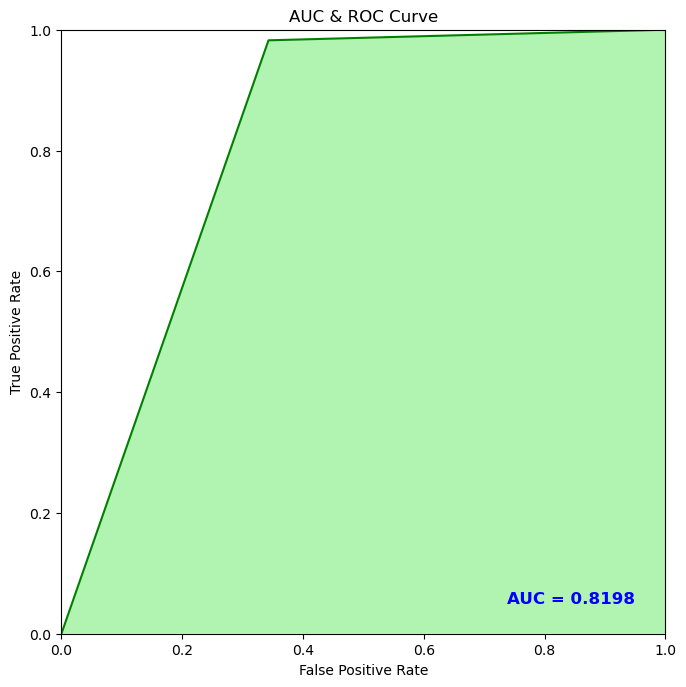

In [61]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, pred_final)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, pred_final)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

here i ploted the AUC & ROC CURVE

## Now we dump the final output

In [62]:
import pickle
filename = 'loan_prediction.pkl'
pickle.dump(lr2,open(filename,'wb'))